In [1]:
##imports all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori
import random
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
%matplotlib inline

In [2]:
path ="600092_data.csv" 
df = pd.read_csv(path, encoding = 'utf-8')

df_copy1 = df.copy()##used for cleaning
df_copy2 = df.copy()##cleaned model for 1.0
df_copy4 = df.copy()##cleaned model for 2.0
df_copy6 = df.copy()##cleaned model for 3.0

##df is the original dataframe

# Data Exploration phase

During this period, a brief overview of what is contained in our legacy data is observed and weighed in regard to its respective attribute



## Expected data types

Data attributes for each column are displayed below:

* Random column - Real numbers(all unique)
* ID column - Real numbers(all unique but duplicates allowed)
* Indication - string/object type (4 nominal values)"ASx, A-F,CVA,TIA"
* Diabetes - string/object type(2 nominal values)"yes, no"
* IHD - string/object type(2 nominal values)"yes, no"
* Hypertension - string/object type(2 nominal values)"yes, no"
* Arrhythmia - string/object type(2 nominal values)"yes, no"
* History - string/object type(2 nominal values)"yes, no"
* IPSI - float type(0 - 100)
* Contra - float type(0 - 100)
* label - string/object type(2 nominal values)"risk,no risk"

In [3]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


In [4]:
df.isnull().sum()
##checks for null values in dataframe in each attribute

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          0
label           3
dtype: int64

In [5]:
df.describe()

,Random,Id,IPSI
count,1520.000000,1520.000000,1516.000000
mean,0.509545,188365.022368,78.872032
std,0.284006,64355.870242,10.162351
min,0.000295,78261.000000,35.000000
25%,0.268531,137130.750000,73.000000
50%,0.517616,191344.500000,77.000000
75%,0.754724,244559.500000,85.000000
max,0.999448,295978.000000,99.000000


In [6]:
df['Contra'].describe()

count     1520
unique      41
top        100
freq       244
Name: Contra, dtype: object

In [7]:
df['Indication'].describe()

count     1517
unique       5
top        A-F
freq       493
Name: Indication, dtype: object

In [8]:
df['IHD'].describe()

count     1520
unique       2
top         no
freq       801
Name: IHD, dtype: object

In [9]:
df['History'].describe()

count     1518
unique       2
top         no
freq      1494
Name: History, dtype: object

In [10]:
df['label'].describe()

count       1517
unique         3
top       NoRisk
freq        1008
Name: label, dtype: object

In [11]:
df['Diabetes'].describe()

count     1518
unique       2
top         no
freq      1441
Name: Diabetes, dtype: object

In [12]:
df['Arrhythmia'].describe()

count     1520
unique       2
top         no
freq      1190
Name: Arrhythmia, dtype: object

In [13]:
df['IPSI'].describe()

count    1516.000000
mean       78.872032
std        10.162351
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

### First Analysis

* All data attributes match its respective data type apart from Contra. This indicates that Contra needs cleaning.
* IPSI, CONTRA, Hypertension, indication, history and label contain null values as per "df.isnull().sum()" function


### Second Analysis 

Code below returns "yes" if duplicate values found in random

In [14]:
f =  df.duplicated(subset='Random', keep=False)
t = True

for item in f:
    if item == t:
        print("yes")
        break

yes


Whereas the Id attribute contains no duplicates as shown in code below because it didnt return "true" for all variables 

In [15]:
f =  df.duplicated(subset='Id', keep=False)
t = True

for item in f:
    if item == t:
        print("yes")
        break

### Conclusion

After careful analysis the following attributes need cleaning:
* Random attribute
* Hypertension attribute
* Diabetes attribute
* Contra attribute
* IPSI attribute
* Indication attribute
* History attribute

# Data Preparation Phase

This section involves all cleaning methods done to prepare our data for feeding it to our fin al model classifier to predict patient mortality

## Cleaning 1.0

### Hypertension cleaning

#### Step 1

The first step involves locating the index in which the null value(s) are located. This is done by separating out the hypertension column into a pandas.series and creating a truth table. If the value in the truth table returns "true" the index of that value(s) is stored in a list.

The indexes are kept track of by a counter variable. Using the indexes stored in the list, the null values are then located using "df_copy1.loc[var, :]" where "var" is a value in the list 

In [16]:
df_copy1 = df.copy()
Hypertension_column = df_copy1['Hypertension']
Hypertension_null_index_positions = []

x = Hypertension_column.isnull()
t = True
counter = 0
for item in x:
    if item == t:
        Hypertension_null_index_positions.append(counter)
    counter = counter + 1

Hypertension_null_index_positions

[201, 590, 983]

In [17]:
print(df_copy1.loc[201, :])
##yes

x = df_copy2.loc[201, :]
x[5] = "yes"
df_copy2.loc[201, :] = x

Random          0.38879
Id               240232
Indication          CVA
Diabetes            yes
IHD                  no
Hypertension        NaN
Arrhythmia          yes
History              no
IPSI                 95
Contra               90
label              Risk
Name: 201, dtype: object


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
print(df_copy1.loc[590, :])
##no

x = df_copy2.loc[590, :]
x[5] = "no"
df_copy2.loc[590, :] = x

Random          0.70795
Id               289096
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        NaN
Arrhythmia           no
History              no
IPSI                 78
Contra               30
label            NoRisk
Name: 590, dtype: object


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
print(df_copy1.loc[983, :])
##no

x = df_copy2.loc[983, :]
x[5] = "no"
df_copy2.loc[983, :] = x

Random          0.319215
Id                158024
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         NaN
Arrhythmia            no
History               no
IPSI                  75
Contra                75
label             NoRisk
Name: 983, dtype: object


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### Step 2

In relation to the previous step, we consider all nominal values surrounding the missing variable to generate a query for the dataframe. In this case, the missing variable is Hypertension. 

Therefore, for the first missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* CVA - Indication 
* yes - Diabetes
* no - IHD
* yes - Arrhythmia
* no - History

(as seen in df_copy1.query)

       Random      Id Indication Diabetes IHD Hypertension Arrhythmia History  \
33   0.711928  112060        CVA      yes  no          yes        yes      no   
138  0.922243  121453        CVA      yes  no          yes        yes      no   
201  0.388790  240232        CVA      yes  no          NaN        yes      no   
401  0.292205  104263        CVA      yes  no          yes        yes      no   
509  0.027813  159906        CVA      yes  no          yes        yes      no   

     IPSI Contra label  
33   95.0     75  Risk  
138  95.0     90  Risk  
201  95.0     90  Risk  
401  95.0     75  Risk  
509  95.0     75  Risk  


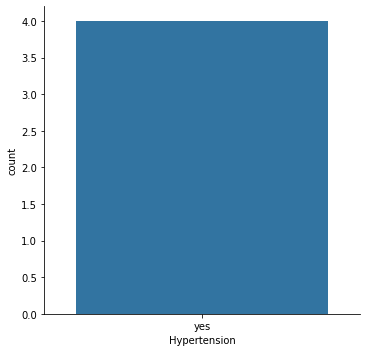

In [20]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('Indication == "CVA" and Diabetes =="yes" and IHD =="no" and Arrhythmia == "yes" and History =="no"', inplace = True) 
copy1 = df_copy1
sns.catplot('Hypertension', data = copy1, kind='count' )
print(copy1)

for the second missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* A-F - Indication 
* no - Diabetes
* no - IHD
* no - Arrhythmia
* no - History

(as seen in df_copy1.query)

        Random      Id Indication Diabetes IHD Hypertension Arrhythmia  \
0     0.602437  218242        A-F       no  no          yes         no   
18    0.479682  284552        A-F       no  no           no         no   
20    0.890427  250562        A-F       no  no          yes         no   
27    0.147857  295155        A-F       no  no          yes         no   
29    0.806727  104062        A-F       no  no           no         no   
...        ...     ...        ...      ...  ..          ...        ...   
1464  0.380711  150464        A-F       no  no          yes         no   
1471  0.336300   94033        A-F       no  no          yes         no   
1483  0.972796   83632        A-F       no  no           no         no   
1486  0.313941   95434        A-F       no  no           no         no   
1502  0.636996  176877        A-F       no  no           no         no   

     History  IPSI Contra   label  
0         no  78.0    20   NoRisk  
18        no  75.0    100    Risk  
20 

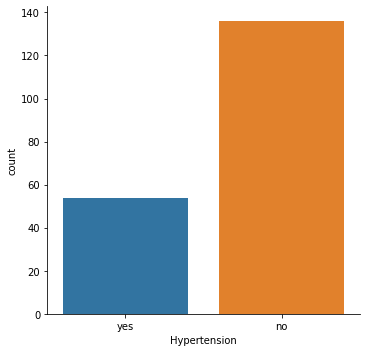

In [21]:
df_copy1 = df.copy()##first line included  to 'reset' the dataframe
df_copy1.query('Indication == "A-F" and Diabetes =="no" and IHD =="no" and Arrhythmia == "no" and History =="no"', inplace = True) 
copy1 = df_copy1
sns.catplot('Hypertension', data = copy1, kind='count' )
print(copy1)

for the third missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* TIA - Indication 
* no - Diabetes
* no - IHD
* no - Arrhythmia
* no - History

(as seen in df_copy1.query)

        Random      Id Indication Diabetes IHD Hypertension Arrhythmia  \
1     0.602437  159284        TIA       no  no           no         no   
3     0.128157  229592        TIA       no  no          yes         no   
8     0.678157  256128        TIA       no  no          yes         no   
24    0.616346  269505        TIA       no  no          yes         no   
35    0.426172  212137        TIA       no  no           no         no   
...        ...     ...        ...      ...  ..          ...        ...   
1487  0.589828  252007        TIA       no  no          yes         no   
1496  0.835616  203306        TIA       no  no          yes         no   
1500  0.651685  250503        TIA       no  no           no         no   
1512  0.164733  167652        TIA       no  no          yes         no   
1517  0.620373  101754        TIA       no  no          yes         no   

     History  IPSI Contra   label  
1         no  70.0    60   NoRisk  
3         no  90.0     85    Risk  
8  

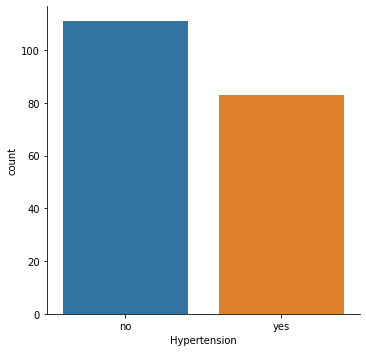

In [22]:
df_copy1 = df.copy()##first line included  to 'reset' the dataframe
df_copy1.query('Indication == "TIA" and Diabetes =="no" and IHD =="no" and Arrhythmia == "no" and History =="no"', inplace = True) 
copy1 = df_copy1
sns.catplot('Hypertension', data = copy1, kind='count' )
print(copy1)

### Indication cleaning

#### Step 1

Same methodology is used(in regard to Hypertension cleaning, Step 1)

In [23]:
df_copy1 = df.copy()
Indication_column = df_copy1['Indication']
Indication_null_index_positions = []

x = Indication_column.isnull()
t = True
counter = 0
for item in x:
    if item == t:
        Indication_null_index_positions.append(counter)
    counter = counter + 1

Indication_null_index_positions

[442, 822, 1007]

In [24]:
df_copy1.loc[442, :]

x = df_copy2.loc[442, :]
x[2] = "TIA"
df_copy2.loc[442, :] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
df_copy1.loc[822, :]

x = df_copy2.loc[822, :]
x[2] = "A-F"
df_copy2.loc[822, :] = x


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
df_copy1.loc[1007, :]

x = df_copy2.loc[1007, :]
x[2] = "CVA"
df_copy2.loc[1007, :] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Step 2
* Same methodology for step 2 is used(with refere nce to hypertension scleaning step 2). However In this case, the missing variable is found in indication attribute. 

Therefore, for the first missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* yes - Hypertension 
* no - Diabetes
* yes - IHD
* no - Arrhythmia
* no - History
* NoRisk - Label

(as seen in df_copy1.query)

        Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
43    0.334210  188138        CVA       no  yes          yes         no   
53    0.369255  206952        TIA       no  yes          yes         no   
69    0.509825  167740        TIA       no  yes          yes         no   
90    0.821317   93801        A-F       no  yes          yes         no   
93    0.460332  206974        TIA       no  yes          yes         no   
...        ...     ...        ...      ...  ...          ...        ...   
1468  0.850374  254679        TIA       no  yes          yes         no   
1475  0.085518  183511        CVA       no  yes          yes         no   
1479  0.826108  155876        TIA       no  yes          yes         no   
1505  0.720470   80002        A-F       no  yes          yes         no   
1510  0.898161   95072        CVA       no  yes          yes         no   

     History  IPSI Contra   label  
43        no  80.0    20   NoRisk  
53        no  75.0    60   

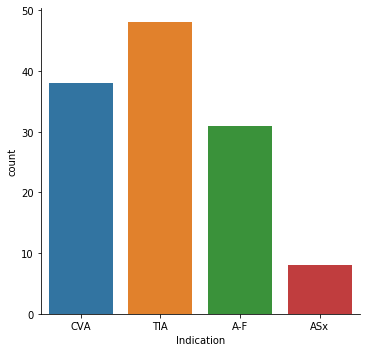

In [27]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and Diabetes =="no" and IHD =="yes" and Hypertension == "yes" and Arrhythmia == "no" and History =="no"', inplace = True) 
copy1 = df_copy1
sns.catplot('Indication', data = copy1, kind='count' )
print(copy1)

for the second missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* no - Hypertension 
* no - Diabetes
* yes - IHD
* no - Arrhythmia
* no - History
* Risk - Label
(as seen in df_copy1.query)

        Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
308   0.275192  194322        A-F       no  yes           no         no   
415   0.506597   92630        A-F       no  yes           no         no   
465   0.068594  195018        TIA       no  yes           no         no   
481   0.955421  252057        A-F       no  yes           no         no   
513   0.009762  157056        TIA       no  yes           no         no   
601   0.844552  241848        TIA       no  yes           no         no   
613   0.435405  246007        A-F       no  yes           no         no   
705   0.198733  269138        A-F       no  yes           no         no   
822   0.211760  205845        NaN       no  yes           no         no   
859   0.456425  108354        TIA       no  yes           no         no   
867   0.328586  240330        TIA       no  yes           no         no   
1043  0.517686  132044        A-F       no  yes           no         no   
1114  0.751350  150363   

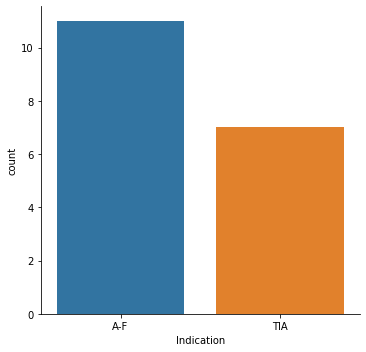

In [28]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and Diabetes =="no" and IHD =="yes" and Hypertension == "no" and Arrhythmia == "no" and History =="no"', inplace = True) 
copy1 = df_copy1
sns.catplot('Indication', data = copy1, kind='count' )
print(copy1)

for the third missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* no - Hypertension 
* no - Diabetes
* no - IHD
* yes - Arrhythmia
* yes - History
* Risk - Label

(as seen in df_copy1.query)

        Random      Id Indication Diabetes IHD Hypertension Arrhythmia  \
824   0.903894  191582        CVA       no  no           no        yes   
848   0.320810  174229        CVA       no  no           no        yes   
1007  0.761219  256076        NaN       no  no           no        yes   
1074  0.055136  163765        CVA       no  no           no        yes   
1159  0.593478  191288        CVA       no  no           no        yes   

     History  IPSI Contra label  
824      yes  99.0    100  Risk  
848      yes  99.0    100  Risk  
1007     yes  99.0    100  Risk  
1074     yes  99.0    100  Risk  
1159     yes  99.0    100  Risk  


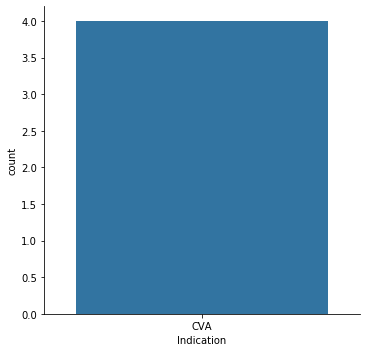

In [29]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and Diabetes =="no" and IHD =="no" and Hypertension == "no" and Arrhythmia == "yes" and History =="yes"', inplace = True) 
copy1 = df_copy1
sns.catplot('Indication', data = copy1, kind='count' )
print(copy1)

### History values 

#### Step 1

The first step involves locating the index in which the null value(s) are located. This is done by separating out the History column into a pandas.series and creating a truth table. If the value in the truth table returns "true" the index of that value(s) is stored in a list.

The indexes are kept track of by a counter variable. Using the indexes stored in the list, the null values are then located using "df_copy1.loc[var, :]" where "var" is a value in the list 

In [30]:
df_copy1 = df.copy()
History_column = df_copy1['History']
History_null_index_positions = []

x = History_column.isnull()
t = True
counter = 0
for item in x:
    if item == t:
        History_null_index_positions.append(counter)
    counter = counter + 1

History_null_index_positions

[337, 784]

In [31]:
df_copy1.loc[337, :]

x = df_copy2.loc[337, :]
x[7] = "no"
df_copy2.loc[337, :] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
df_copy1.loc[784, :]

x = df_copy2.loc[784, :]
x[7] = "no"
df_copy2.loc[784, :] = x

df_copy2.loc[784, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.243645
Id                196483
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra               100
label               Risk
Name: 784, dtype: object

#### Step 2

In relation to the previous step, we consider all nominal values surrounding the missing variable to generate a query for the dataframe. In this case, the missing variable is Hypertension. 

Therefore, for the first missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* no - Hypertension 
* no - Diabetes
* yes - IHD
* no - Arrhythmia
* CVA - Indication
* NoRisk - Label

        Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
28    0.952292  152936        CVA       no  yes           no         no   
34    0.429965  192217        CVA       no  yes           no         no   
49    0.079880   79276        CVA       no  yes           no         no   
80    0.969951  153571        CVA       no  yes           no         no   
91    0.135940  246147        CVA       no  yes           no         no   
145   0.464748  164667        CVA       no  yes           no         no   
173   0.571097  278916        CVA       no  yes           no         no   
176   0.661404  232617        CVA       no  yes           no         no   
209   0.811883  245682        CVA       no  yes           no         no   
301   0.581815  178842        CVA       no  yes           no         no   
326   0.032843  295228        CVA       no  yes           no         no   
337   0.617072  260770        CVA       no  yes           no         no   
342   0.115038   88683   

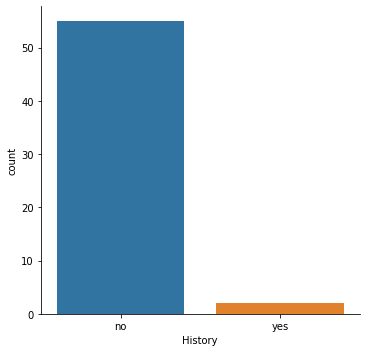

In [33]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and Diabetes =="no" and IHD =="yes" and Hypertension == "no" and Arrhythmia == "no" and Indication =="CVA"', inplace = True) 
copy1 = df_copy1
sns.catplot('History', data = copy1, kind='count' )
print(copy1)

for the SECOND missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* YES - Hypertension 
* no - Diabetes
* no - IHD
* YES - Arrhythmia
* CVA - Indication
* Risk - Label

        Random      Id Indication Diabetes IHD Hypertension Arrhythmia  \
58    0.474349  127162        CVA       no  no          yes        yes   
125   0.121791   99788        CVA       no  no          yes        yes   
186   0.656033  274184        CVA       no  no          yes        yes   
231   0.779279  289639        CVA       no  no          yes        yes   
296   0.952549  206996        CVA       no  no          yes        yes   
304   0.518919  144129        CVA       no  no          yes        yes   
306   0.468218  280296        CVA       no  no          yes        yes   
319   0.924900  128814        CVA       no  no          yes        yes   
335   0.327012  244458        CVA       no  no          yes        yes   
339   0.238195  104918        CVA       no  no          yes        yes   
452   0.859137   95343        CVA       no  no          yes        yes   
454   0.570452  279204        CVA       no  no          yes        yes   
571   0.781024  146511        CVA     

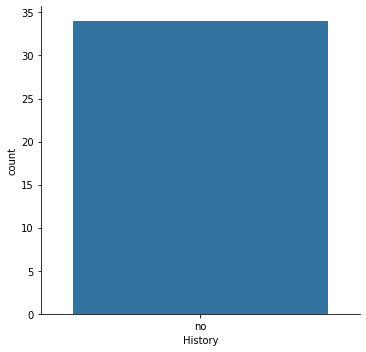

In [34]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and Diabetes =="no" and IHD =="no" and Hypertension == "yes" and Arrhythmia == "yes" and Indication =="CVA"', inplace = True) 
copy1 = df_copy1
sns.catplot('History', data = copy1, kind='count' )
print(copy1)

### Diabetes values 

#### Step 1

The first step involves locating the index in which the null value(s) are located. This is done by separating out the Diabetes column into a pandas.series and creating a truth table. If the value in the truth table returns "true" the index of that value(s) is stored in a list.

The indexes are kept track of by a counter variable. Using the indexes stored in the list, the null values are then located using "df_copy1.loc[var, :]" where "var" is a value in the list 

In [35]:
df_copy1 = df.copy()
Diabetes_column = df_copy1['Diabetes']
Diabetes_null_index_positions = []

x = Diabetes_column.isnull()
t = True
counter = 0
for item in x:
    if item == t:
        Diabetes_null_index_positions.append(counter)
    counter = counter + 1

Diabetes_null_index_positions

[447, 514]

In [36]:
df_copy1.loc[447, :]

x = df_copy2.loc[447, :]
x[3] = "no"
df_copy2.loc[447, :] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
df_copy1.loc[514, :]

x = df_copy2.loc[ 514, :]
x[3] = "no"
df_copy2.loc[514, :] = x

df_copy2.loc[514, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.39213
Id               210861
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 80
Contra               40
label            NoRisk
Name: 514, dtype: object

#### Step 2

In relation to the previous step, we consider all nominal values surrounding the missing variable to generate a query for the dataframe. In this case, the missing variable is Hypertension. 

Therefore, for the first missing variable we consider its respective nominal values surrounding to generate a query for the dataframe which are:
* yes - Hypertension 
* no - History
* yes - IHD
* yes - Arrhythmia
* CVA - Indication
* Risk - Label

        Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
10    0.678157  174588        CVA       no  yes          yes        yes   
13    0.025356  224025        CVA       no  yes          yes        yes   
15    0.025356  219417        CVA       no  yes          yes        yes   
55    0.214769  107364        CVA       no  yes          yes        yes   
104   0.655518  217261        CVA       no  yes          yes        yes   
...        ...     ...        ...      ...  ...          ...        ...   
1282  0.265680  135694        CVA       no  yes          yes        yes   
1309  0.205951  204022        CVA       no  yes          yes        yes   
1350  0.730029  180993        CVA       no  yes          yes        yes   
1466  0.777815  214204        CVA       no  yes          yes        yes   
1484  0.411551  232686        CVA       no  yes          yes        yes   

     History  IPSI Contra label  
10        no  75.0     50  Risk  
13        no  75.0     50  Risk

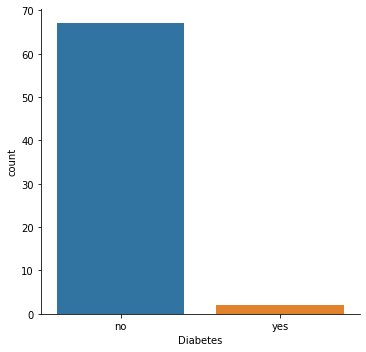

In [38]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and History =="no" and IHD =="yes" and Hypertension == "yes" and Arrhythmia == "yes" and Indication =="CVA"', inplace = True) 
copy1 = df_copy1
sns.catplot('Diabetes', data = copy1, kind='count' )
print(copy1)

for the SECOND missing variable we consider its respective nominal values surrounding to generate a query for the database which are:
* YES - Hypertension 
* no - History
* no - IHD
* no - Arrhythmia
* A-F - Indication
* NoRisk - Label

        Random      Id Indication Diabetes IHD Hypertension Arrhythmia  \
0     0.602437  218242        A-F       no  no          yes         no   
20    0.890427  250562        A-F       no  no          yes         no   
27    0.147857  295155        A-F       no  no          yes         no   
46    0.475562  263601        A-F       no  no          yes         no   
47    0.486382  190335        A-F       no  no          yes         no   
54    0.927099  247629        A-F       no  no          yes         no   
62    0.869874  101697        A-F       no  no          yes         no   
64    0.221221   90643        A-F       no  no          yes         no   
73    0.030122  162168        A-F       no  no          yes         no   
88    0.821317   84553        A-F       no  no          yes         no   
99    0.897747  255097        A-F       no  no          yes         no   
137   0.800132  291452        A-F       no  no          yes         no   
195   0.999448  252619        A-F     

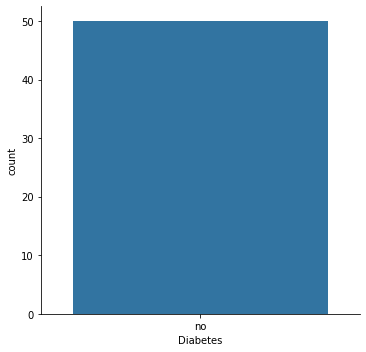

In [39]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and History =="no" and IHD =="no" and Hypertension == "yes" and Arrhythmia == "no" and Indication =="A-F"', inplace = True) 
copy1 = df_copy1
sns.catplot('Diabetes', data = copy1, kind='count' )
print(copy1)

### Float/ Integer values
### Contra and IPSI
### Step 1 (IPSI)

The first step involves locating the index in which the null value(s) are located. This is done by separating out the IPSI column into a pandas.series and creating a truth table. If the value in the truth table returns "true" the index of that value(s) is stored in a list.

The indexes are kept track of by a counter variable. Using the indexes stored in the list, the null values are then located using "df_copy1.loc[var, :]" where "var" is a value in the list 

In [40]:
df_copy1 = df.copy()
IPSI_column = df_copy1['IPSI']
IPSI_null_index_positions = []

x = IPSI_column.isnull()
t = True
counter = 0
for item in x:
    if item == t:
        IPSI_null_index_positions.append(counter)
    counter = counter + 1

IPSI_null_index_positions
df_copy1 = df.copy()

#### Step 2(IPSI)
In relation to the previous step, we consider all nominal values surrounding the missing variable to generate a query for the dataframe. In this case, the missing variable is Hypertension. 

Therefore, for the first missing variable we consider its respective nominal values surrounding to generate a query for the dataframe which are:
* NO - Hypertension 
* no - History
* NO - IHD
* NO - Arrhythmia
* CVA - A-F
* Risk - Label

In [41]:
df_copy1.loc[620, :]

x = df_copy2.loc[ 620, :]
x[8] = 80.0
df_copy2.loc[620, :] = x

df_copy2.loc[620, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.283872
Id                227779
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  80
Contra               100
label               Risk
Name: 620, dtype: object

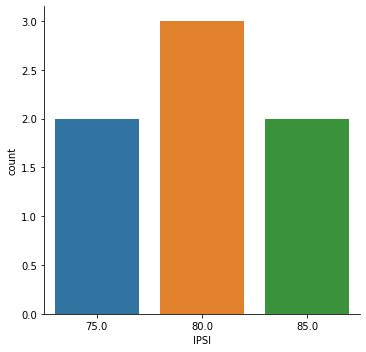

In [42]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and History =="no" and IHD =="no" and Diabetes == "no" and Hypertension == "no" and Contra =="100" and Arrhythmia == "no" and Indication =="A-F"', inplace = True) 
copy1 = df_copy1
sns.catplot('IPSI', data = copy1, kind='count' )
df_copy1 = df.copy()

Second missing variable we consider its respective nominal values surrounding to generate a query for the dataframe which are:
* yes - Hypertension 
* no - History
* yes - IHD
* yes - Arrhythmia
* CVA - Indication
* no - Diabetes
* Risk - Label

In [43]:
df_copy1.loc[752, :]

x = df_copy2.loc[ 752, :]
x[8] = 90.0
df_copy2.loc[752, :] = x

df_copy2.loc[752, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.243518
Id                146415
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 752, dtype: object

        Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
15    0.025356  219417        CVA       no  yes          yes        yes   
104   0.655518  217261        CVA       no  yes          yes        yes   
161   0.797144  196834        CVA       no  yes          yes        yes   
182   0.965866   97917        CVA       no  yes          yes        yes   
230   0.251238  141091        CVA       no  yes          yes        yes   
241   0.551513  210166        CVA       no  yes          yes        yes   
257   0.321852  271690        CVA       no  yes          yes        yes   
268   0.457256  270141        CVA       no  yes          yes        yes   
271   0.986814  186277        CVA       no  yes          yes        yes   
314   0.875273  123618        CVA       no  yes          yes        yes   
461   0.346396  184196        CVA       no  yes          yes        yes   
505   0.438228  181950        CVA       no  yes          yes        yes   
517   0.160044  234588   

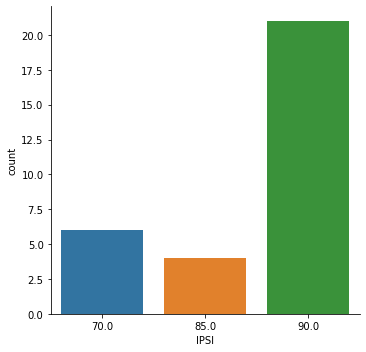

In [44]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "Risk" and History =="no" and IHD =="yes" and Diabetes == "no" and Contra =="100" and Hypertension == "yes" and Arrhythmia == "yes" and Indication =="CVA"', inplace = True) 
copy1 = df_copy1
sns.catplot('IPSI', data = copy1, kind='count' )
df_copy1 = df.copy()
print(copy1)

In [45]:
df_copy1.loc[845, :]

x = df_copy2.loc[ 845, :]
x[8] = 70.0
df_copy2.loc[845, :] = x

df_copy2.loc[845, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.920096
Id                104176
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra                20
label             NoRisk
Name: 845, dtype: object

        Random      Id Indication Diabetes IHD Hypertension Arrhythmia  \
4     0.676862  245829        CVA       no  no           no         no   
7     0.538333  261057        CVA       no  no           no         no   
23    0.885271  195912        CVA       no  no           no         no   
30    0.952292  104010        CVA       no  no           no         no   
48    0.647756   86596        CVA       no  no           no         no   
...        ...     ...        ...      ...  ..          ...        ...   
1489  0.151706  154089        CVA       no  no           no         no   
1491  0.881038  207613        CVA       no  no           no         no   
1501  0.977551  195147        CVA       no  no           no         no   
1503  0.278695  141435        CVA       no  no           no         no   
1519  0.634922  254941        CVA       no  no           no         no   

     History  IPSI Contra   label  
4         no  70.0    20   NoRisk  
7         no  75.0    60   NoRisk  
23 

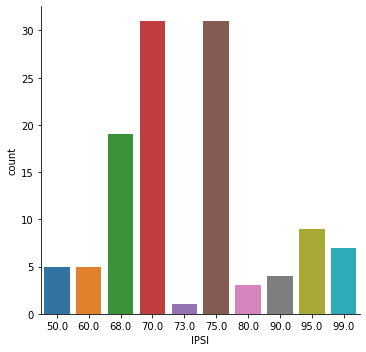

In [46]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and History =="no" and IHD =="no" and Diabetes == "no" and Hypertension == "no" and Arrhythmia == "no" and Indication =="CVA"', inplace = True) 
copy1 = df_copy1
sns.catplot('IPSI', data = copy1, kind='count' )
df_copy1 = df.copy()
print(copy1)

In [47]:
df_copy1.loc[916, :]

x = df_copy2.loc[ 916, :]
x[8] = 80.0
df_copy2.loc[916, :] = x

df_copy2.loc[916, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.00450114
Id                  281679
Indication             A-F
Diabetes                no
IHD                     no
Hypertension            no
Arrhythmia              no
History                 no
IPSI                    80
Contra                  50
label               NoRisk
Name: 916, dtype: object

        Random      Id Indication Diabetes IHD Hypertension Arrhythmia  \
29    0.806727  104062        A-F       no  no           no         no   
40    0.728137   91068        A-F       no  no           no         no   
63    0.533630  210968        A-F       no  no           no         no   
66    0.221221  154412        A-F       no  no           no         no   
77    0.570818  277279        A-F       no  no           no         no   
...        ...     ...        ...      ...  ..          ...        ...   
1449  0.517545  172519        A-F       no  no           no         no   
1461  0.768681  167350        A-F       no  no           no         no   
1483  0.972796   83632        A-F       no  no           no         no   
1486  0.313941   95434        A-F       no  no           no         no   
1502  0.636996  176877        A-F       no  no           no         no   

     History  IPSI Contra   label  
29        no  78.0    30   NoRisk  
40        no  70.0    20   NoRisk  
63 

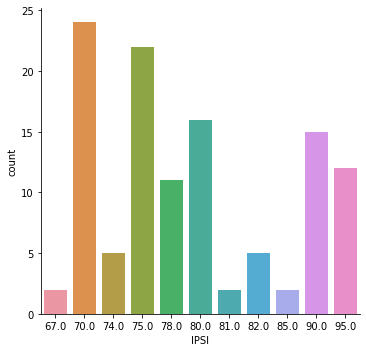

In [48]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and History =="no" and IHD =="no" and Diabetes == "no" and Hypertension == "no" and Arrhythmia == "no" and Indication =="A-F"', inplace = True) 
copy1 = df_copy1
sns.catplot('IPSI', data = copy1, kind='count' )
df_copy1 = df.copy()
print(copy1)

In [49]:
df_copy1 = df.copy()
Contra_column = df_copy1['Contra']
Contra_null_index_positions = []
c = 0
for item in Contra_column:
    if item == " ":
        Contra_null_index_positions.append(c)
    c = c + 1
    
Contra_null_index_positions

[453]

In [50]:
df_copy1.loc[453, :]

x = df_copy2.loc[ 453, :]
x[9] = 60.0
df_copy2.loc[453, :] = x

df_copy2.loc[453, :]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Random          0.518558
Id                254469
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                60
label             NoRisk
Name: 453, dtype: object

        Random      Id Indication Diabetes IHD Hypertension Arrhythmia  \
60    0.869874  232028        ASx       no  no          yes         no   
453   0.518558  254469        ASx       no  no          yes         no   
580   0.580921  294555        ASx       no  no          yes         no   
605   0.196472  173263        ASx       no  no          yes         no   
1372  0.906489  101064        ASx       no  no          yes         no   
1423  0.614189  177127        ASx       no  no          yes         no   

     History  IPSI Contra   label  
60        no  70.0    60   NoRisk  
453       no  70.0         NoRisk  
580       no  70.0    60   NoRisk  
605       no  70.0    60   NoRisk  
1372      no  70.0    60   NoRisk  
1423      no  70.0    60   NoRisk  


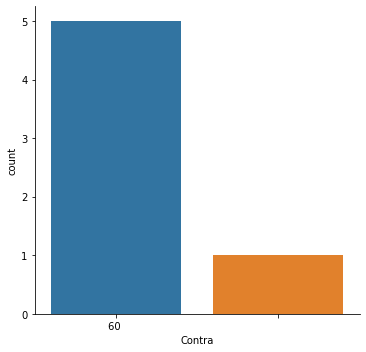

In [51]:
df_copy1 = df.copy() ##first line included  to 'reset' the dataframe
df_copy1.query('label == "NoRisk" and History =="no" and IHD =="no" and Diabetes == "no" and IPSI == 70 and Hypertension == "yes" and Arrhythmia == "no" and Indication =="ASx"', inplace = True) 
copy1 = df_copy1
sns.catplot('Contra', data = copy1, kind='count' )
df_copy1 = df.copy()
print(copy1)

### Repairing Indication (Extra nominal value)

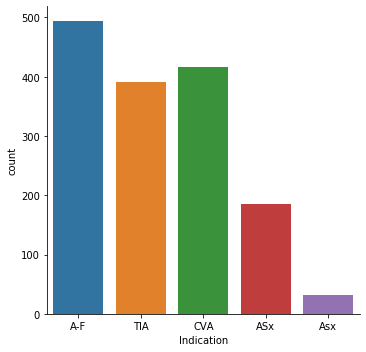

In [52]:
sns.catplot('Indication', data = df_copy2, kind='count' )

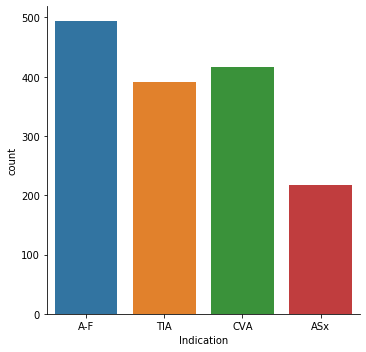

In [53]:
df_copy2['Indication'] = df_copy2['Indication'].replace(['Asx'], 'ASx')
sns.catplot('Indication', data = df_copy2, kind='count' )

In [54]:
df_copy2['Indication'].describe()

count     1520
unique       4
top        A-F
freq       494
Name: Indication, dtype: object

In [55]:
df_copy2['Diabetes'].describe()

count     1520
unique       2
top         no
freq      1443
Name: Diabetes, dtype: object

In [56]:
df_copy2['Hypertension'].describe()

count     1520
unique       2
top         no
freq       786
Name: Hypertension, dtype: object

In [57]:
df_copy2['History'].describe()

count     1520
unique       2
top         no
freq      1496
Name: History, dtype: object

In [58]:
df_copy2['Arrhythmia'].describe()

count     1520
unique       2
top         no
freq      1190
Name: Arrhythmia, dtype: object

In [59]:
df_copy2['IPSI'].describe()

count    1520.000000
mean       78.875000
std        10.155611
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

In [60]:
contra = df_copy2['Contra']
c = 0
for item in contra:
    contra[c] = float(item)
    c = c + 1
contra.describe()

df_copy2['Contra'] = contra

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [61]:

label = df_copy2['label'].isnull()
c = 0
t = True
Llist = []
for item in label:
    if item == t:
        Llist.append(c)
    c = c + 1
Llist

[812, 974, 1418]

In [62]:
df_copy2


,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


# Modelling 1
## Using neural network

In [63]:
df_copy3 = df_copy2.copy()

x = df_copy3.loc[812, :]
x[10] = "NoRisk"
df_copy3.loc[812, :] = x

x = df_copy3.loc[974, :]
x[10] = "NoRisk"
df_copy3.loc[974, :] = x

x = df_copy3.loc[1418, :]
x[10] = "NoRisk"
df_copy3.loc[1418, :] = x

x = df_copy3.loc[475, :]
x[10] = "NoRisk"
df_copy3.loc[475, :] = x

x = df_copy3.loc[523, :]
x[10] = "NoRisk"
df_copy3.loc[523, :] = x


##class dictionaries
Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "TIA": 4}
Dual_class_dict = {"yes": 1, "no": 2}
label_class_dict = {"Risk": 1, "NoRisk": 2, "NaN": 3}

##mapping
df_copy3['Diabetes'] = df_copy3['Diabetes'].map(Dual_class_dict)
df_copy3['Hypertension'] = df_copy3['Hypertension'].map(Dual_class_dict)
df_copy3['History'] = df_copy3['History'].map(Dual_class_dict)
df_copy3['Indication'] = df_copy3['Indication'].map(Indication_class_dict)
df_copy3['Arrhythmia'] = df_copy3['Arrhythmia'].map(Dual_class_dict)
df_copy3['IHD'] = df_copy3['IHD'].map(Dual_class_dict)
df_copy3['label'] = df_copy3['label'].map(label_class_dict)

##df_copy3['label'] = df_copy3['label'].map(label_class_dict, na_action = 'ignore')
##df_copy3.query('label == "2"', inplace = True) 

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\scowt\Anaconda3\lib\site-pack

In [64]:
df_copy3['label'].isnull().sum()

label = df_copy3['label'].isnull()
c = 0
t = True
Llist = []
for item in label:
    if item == t:
        Llist.append(c)
    c = c + 1
Llist

[]

In [65]:
df_copy3.isnull().sum()

Random          0
Id              0
Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

In [66]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import svm



# Model 1.0

In [67]:
df_copy3.drop(df_copy3.columns[[0, 1]], axis = 1, inplace = True) ##only needs to be done once

### Train/test split

In [68]:
df_copy3 = sklearn.utils.shuffle(df_copy3) #always shuffle your data to avoid any biases 
X = df_copy3.drop("label", axis=1).values
y = df_copy3["label"].values

##training
test_size = 50

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]

### SVM model(Model 1.0)

In [69]:
clf = svm.SVR()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.7880186272953734


C:\Users\scowt\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [70]:
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(clf.predict([X])[0])
    actual_predictions.append(y)

### logistic regression(Model 1.1)

In [71]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.94


C:\Users\scowt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(model.predict([X])[0])
    actual_predictions.append(y)

### Multi layer perceptron(Model 1.2)

In [73]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='sgd', max_iter=500000, hidden_layer_sizes=(10,20,30,35,45,30,40,50,20,10), random_state=42)
trained_model = model.fit(X_train,y_train)
print(trained_model.score(X_test, y_test))

0.66


In [74]:
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(trained_model.predict([X])[0])
    actual_predictions.append(y)

# Cleaning 2.0 (Decision trees)

## Data preparation and training

Data is first cleared of all null values before being fed into the decision tree algorithm. Nulls are cleared to increase efficiency of the decicion tree.

In [75]:
from sklearn import tree

d = df_copy4.dropna() ## drops all null values
d = d.reset_index() ##resets index in order to locate data points by index correctly

Dataframe is then processed so that it can be digestible by the decision tree model. This is done by mapping through converting nominal values into integer values. This will be done through mapping. Random and ID attributes are removed as they will not be considered for this model.
However, Contra attribute needs to be first converted to a float/integers

In [76]:
contra = d['Contra']
c = 0  ##counter variable
for item in contra:
    if item == " ":
        contra[c] = float(60)
    contra[c] = float(contra[c])
    c =c + 1

d['Contra'] = contra ## assign floats back to contra

d.drop(d.columns[[0, 1, 2]], axis = 1, inplace = True) ##Random, index and ID columns dropped

##class dictionaries
Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
Dual_class_dict = {"yes": 1, "no": 2}
label_class_dict = {"Risk": 1, "NoRisk": 2}

##mapping
d['Diabetes'] = d['Diabetes'].map(Dual_class_dict)
d['Hypertension'] = d['Hypertension'].map(Dual_class_dict)
d['History'] = d['History'].map(Dual_class_dict)
d['Indication'] = d['Indication'].map(Indication_class_dict)
d['Arrhythmia'] = d['Arrhythmia'].map(Dual_class_dict)
d['IHD'] = d['IHD'].map(Dual_class_dict)
d['label'] = d['label'].map(label_class_dict)

d = d.dropna() ## drops all null values

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## First use case, filling up label values 

Processed data is then fitted into a model and a score is given. For pur first use case, we will train the decision tree to predict the label values. Therefore, our label value will be our label(s) and the rest of the data will be our features. 
The score of the model is then given as shown.

In [77]:
d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 

In [78]:
X = d.drop("label", axis=1).values ##features
y = d["label"].values ##labels

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  99.0


In [79]:
d

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
9,1,2,2,1,1,2,95.0,100,1.0
918,4,2,1,2,2,2,82.0,30,2.0
921,1,2,1,1,1,2,80.0,50,1.0
676,2,2,1,1,2,2,80.0,20,2.0
1278,4,2,1,2,2,2,69.0,20,2.0
...,...,...,...,...,...,...,...,...,...
1056,2,2,1,1,1,2,70.0,100,1.0
526,1,2,2,2,2,2,90.0,30,2.0
349,2,2,2,2,2,2,50.0,50,2.0
1235,2,2,1,1,2,2,85.0,50,2.0


Since the accuracy is quite high, we will use the model to predict our missing label values. However, in order for the model to understand what we give it, we muxt transform the desired data into a 2D array.
The first step is finding the NaN values in our label then transform our data such that our model can understand and predict appropriately.


In [80]:

w = [[1,1,1,1,2,2,75,85]]
model.predict(w)
##2 = Risk
##1 = NoRisk

array([1.])

In [81]:
null_label = []
n_l = df_copy4['label'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[812, 974, 1418]

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case

In [82]:
df_copy4.loc[812,:]

Random          0.756938
Id                190671
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  76
Contra                50
label                NaN
Name: 812, dtype: object

In [83]:
w = [[2,2,1,1,2,2,75,50]] ##variable to put array values
model.predict(w) ##norisk

array([2.])

In [84]:
##replacing values
x = df_copy4.loc[812,:]
x[10] = "NoRisk"
df_copy4.loc[812,:] = x
df_copy4.loc[812,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.756938
Id                190671
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  76
Contra                50
label             NoRisk
Name: 812, dtype: object

In [85]:
df_copy4.loc[974,:]

Random          0.923418
Id                165432
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  80
Contra                70
label                NaN
Name: 974, dtype: object

In [86]:
w = [[2,2,1,1,1,2,80,70]]
model.predict(w) ##risk

array([1.])

In [87]:
##replacing values
x = df_copy4.loc[974,:]
x[10] = "Risk"
df_copy4.loc[974,:] = x
df_copy4.loc[974,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.923418
Id                165432
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  80
Contra                70
label               Risk
Name: 974, dtype: object

In [88]:
df_copy4.loc[1418,:]

Random          0.813102
Id                169726
Indication           TIA
Diabetes             yes
IHD                   no
Hypertension          no
Arrhythmia            no
History              yes
IPSI                  90
Contra                50
label                NaN
Name: 1418, dtype: object

In [89]:
w = [[4,1,2,2,2,1,95,50]] ##variable to put array values
model.predict(w) ##norisk "RISK?"

array([1.])

In [90]:
##replacing values
x = df_copy4.loc[1418,:]
x[10] = "Risk"
df_copy4.loc[1418,:] = x
df_copy4.loc[1418,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.813102
Id                169726
Indication           TIA
Diabetes             yes
IHD                   no
Hypertension          no
Arrhythmia            no
History              yes
IPSI                  90
Contra                50
label               Risk
Name: 1418, dtype: object

In [91]:
df_copy4.loc[475,:]

Random          0.298074
Id                173791
Indication           ASx
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                55
label            Unknown
Name: 475, dtype: object

In [92]:
w = [[3,2,1,1,2,2,70,55]] ##variable to put array values
model.predict(w) ##Risk

array([2.])

In [93]:
##replacing values
x = df_copy4.loc[475,:]
x[10] = "Risk"
df_copy4.loc[475,:] = x
df_copy4.loc[475,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.298074
Id                173791
Indication           ASx
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                55
label               Risk
Name: 475, dtype: object

In [94]:
df_copy4.loc[523,:]

Random          0.46017
Id               283846
Indication          CVA
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia          yes
History              no
IPSI                 95
Contra              100
label           Unknown
Name: 523, dtype: object

In [95]:
w = [[2,2,2,1,1,2,95,100]] ##variable to put array values
model.predict(w) ##risk

array([1.])

In [96]:
##replacing values
x = df_copy4.loc[523,:]
x[10] = "Risk"
df_copy4.loc[523,:] = x
df_copy4.loc[523,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.46017
Id               283846
Indication          CVA
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia          yes
History              no
IPSI                 95
Contra              100
label              Risk
Name: 523, dtype: object

## Second use case, filling up Hypertension values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [97]:
#d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("Hypertension", axis=1).values ##features(tewaked for hypertension)
y = d["Hypertension"].values ##labels(teaked for hypertension)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  91.0


Next step is finding null values in hypertension and using the model to predict its value

In [98]:
null_label = []
n_l = df_copy4['Hypertension'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[201, 590, 983]

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded hypertension in our features, we "skip" hypertension during value input into array

In [99]:
df_copy4.loc[201,:]

Random          0.38879
Id               240232
Indication          CVA
Diabetes            yes
IHD                  no
Hypertension        NaN
Arrhythmia          yes
History              no
IPSI                 95
Contra               90
label              Risk
Name: 201, dtype: object

In [100]:
w = [[2,1,2,1,2,95,90,1]] ##variable to put array values
model.predict(w) ##has hypertension

array([1], dtype=int64)

In [101]:
##replacing values
x = df_copy4.loc[201,:]
x[5] = "yes"
df_copy4.loc[201,:] = x
df_copy4.loc[201,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.38879
Id               240232
Indication          CVA
Diabetes            yes
IHD                  no
Hypertension        yes
Arrhythmia          yes
History              no
IPSI                 95
Contra               90
label              Risk
Name: 201, dtype: object

In [102]:
df_copy4.loc[590,:]

Random          0.70795
Id               289096
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        NaN
Arrhythmia           no
History              no
IPSI                 78
Contra               30
label            NoRisk
Name: 590, dtype: object

In [103]:
w = [[1,2,2,2,2,78,30,2]] ##variable to put array values
model.predict(w) ##no hypertension

array([2], dtype=int64)

In [104]:
##replacing values
x = df_copy4.loc[590,:]
x[5] = "no"
df_copy4.loc[590,:] = x
df_copy4.loc[590,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.70795
Id               289096
Indication          A-F
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 78
Contra               30
label            NoRisk
Name: 590, dtype: object

In [105]:
df_copy4.loc[983,:]

Random          0.319215
Id                158024
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         NaN
Arrhythmia            no
History               no
IPSI                  75
Contra                75
label             NoRisk
Name: 983, dtype: object

In [106]:
w = [[4,2,2,2,2,75,75,2]] ##variable to put array values
model.predict(w) ##no hypertension

array([2], dtype=int64)

In [107]:
##replacing values
x = df_copy4.loc[983,:]
x[5] = "no"
df_copy4.loc[983,:] = x
df_copy4.loc[983,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.319215
Id                158024
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra                75
label             NoRisk
Name: 983, dtype: object

## Third use case, filling up Indication values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [108]:
#d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("Indication", axis=1).values ##features(tewaked for Indication)
y = d["Indication"].values ##labels(teaked for Indication)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  85.0


In [109]:
null_label = []
n_l = df_copy4['Indication'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[442, 822, 1007]

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" hypertension during value input into array

In [110]:
df_copy4.loc[442,:]

Random          0.648122
Id                261060
Indication           NaN
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                40
label             NoRisk
Name: 442, dtype: object

In [111]:
w = [[2,1,1,2,2,70,40,2]] ##variable to put array values
model.predict(w) ## A-F

array([1], dtype=int64)

In [112]:
##replacing values
x = df_copy4.loc[442,:]
x[2] = "A-F"
df_copy4.loc[442,:] = x
df_copy4.loc[442,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.648122
Id                261060
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                40
label             NoRisk
Name: 442, dtype: object

In [113]:
df_copy4.loc[822,:]

Random          0.21176
Id               205845
Indication          NaN
Diabetes             no
IHD                 yes
Hypertension         no
Arrhythmia           no
History              no
IPSI                 80
Contra              100
label              Risk
Name: 822, dtype: object

In [114]:
w = [[2,1,2,2,2,80,100,1]] ##variable to put array values
model.predict(w) ## A-F

array([1], dtype=int64)

In [115]:
##replacing values
x = df_copy4.loc[822,:]
x[2] = "A-F"
df_copy4.loc[822,:] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
df_copy4.loc[1007,:]

Random          0.761219
Id                256076
Indication           NaN
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia           yes
History              yes
IPSI                  99
Contra               100
label               Risk
Name: 1007, dtype: object

In [117]:
w = [[2,2,2,1,1,99,100,1]] ##variable to put array values
model.predict(w) ## CVA

array([2], dtype=int64)

In [118]:
##replacing values
x = df_copy4.loc[1007,:]
x[2] = "CVA"
df_copy4.loc[1007,:] = x

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Fourth use case, filling up IPSI values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [119]:
#d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("IPSI", axis=1).values ##features(tewaked for IPSI)
y = d["IPSI"].values ##labels(teaked for IPSI)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]

In [120]:
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  56.99999999999999


In [121]:
for X, y in zip(X_test, y_test):
    print(f"Model: {model.predict([X])[0]}, Actual: {y}")

Model: 75.0, Actual: 76.0
Model: 90.0, Actual: 90.0
Model: 80.0, Actual: 95.0
Model: 69.0, Actual: 80.0
Model: 75.0, Actual: 85.0
Model: 70.0, Actual: 70.0
Model: 75.0, Actual: 75.0
Model: 70.0, Actual: 70.0
Model: 85.0, Actual: 80.0
Model: 65.0, Actual: 65.0
Model: 76.0, Actual: 76.0
Model: 69.0, Actual: 68.0
Model: 70.0, Actual: 70.0
Model: 99.0, Actual: 70.0
Model: 75.0, Actual: 76.0
Model: 80.0, Actual: 80.0
Model: 70.0, Actual: 77.0
Model: 78.0, Actual: 78.0
Model: 75.0, Actual: 85.0
Model: 95.0, Actual: 95.0
Model: 76.0, Actual: 76.0
Model: 78.0, Actual: 80.0
Model: 70.0, Actual: 70.0
Model: 90.0, Actual: 90.0
Model: 95.0, Actual: 80.0
Model: 78.0, Actual: 90.0
Model: 80.0, Actual: 80.0
Model: 75.0, Actual: 75.0
Model: 70.0, Actual: 70.0
Model: 95.0, Actual: 95.0
Model: 75.0, Actual: 75.0
Model: 70.0, Actual: 77.0
Model: 80.0, Actual: 75.0
Model: 68.0, Actual: 71.0
Model: 80.0, Actual: 80.0
Model: 55.0, Actual: 55.0
Model: 78.0, Actual: 78.0
Model: 70.0, Actual: 70.0
Model: 76.0,

In [122]:
null_label = []
n_l = df_copy4['IPSI'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[620, 752, 845, 916]

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" IPSI during value input into array

In [123]:
df_copy4.loc[620,:]

Random          0.283872
Id                227779
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                 NaN
Contra               100
label               Risk
Name: 620, dtype: object

In [124]:
w = [[1,2,2,2,2,2,100,1]] ##variable to put array values
model.predict(w) ## 80

array([80.])

In [125]:
##replacing values
x = df_copy4.loc[620,:]
x[8] = 80
df_copy4.loc[620,:] = x
df_copy4.loc[620,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.283872
Id                227779
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  80
Contra               100
label               Risk
Name: 620, dtype: object

In [126]:
df_copy4.loc[752,:]

Random          0.243518
Id                146415
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                 NaN
Contra               100
label               Risk
Name: 752, dtype: object

In [127]:
w = [[2,2,1,1,1,2,100,1]] ##variable to put array values
model.predict(w) ## 90

array([90.])

In [128]:
##replacing values
x = df_copy4.loc[752,:]
x[8] = 90
df_copy4.loc[752,:] = x
df_copy4.loc[752,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.243518
Id                146415
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 752, dtype: object

In [129]:
df_copy4.loc[845,:]

Random          0.920096
Id                104176
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                 NaN
Contra                20
label             NoRisk
Name: 845, dtype: object

In [130]:
w = [[2,2,2,2,2,2,20,2]] ##variable to put array values
model.predict(w) ## 60

array([60.])

In [131]:
##replacing values
x = df_copy4.loc[845,:]
x[8] = 60
df_copy4.loc[845,:] = x
df_copy4.loc[845,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.920096
Id                104176
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  60
Contra                20
label             NoRisk
Name: 845, dtype: object

In [132]:
df_copy4.loc[916,:]

Random          0.00450114
Id                  281679
Indication             A-F
Diabetes                no
IHD                     no
Hypertension            no
Arrhythmia              no
History                 no
IPSI                   NaN
Contra                  50
label               NoRisk
Name: 916, dtype: object

In [133]:
w = [[1,2,2,2,2,2,50,2]] ##variable to put array values
model.predict(w) ## 60

array([90.])

In [134]:
##replacing values
x = df_copy4.loc[916,:]
x[8] = 60
df_copy4.loc[916,:] = x
df_copy4.loc[916,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.00450114
Id                  281679
Indication             A-F
Diabetes                no
IHD                     no
Hypertension            no
Arrhythmia              no
History                 no
IPSI                    60
Contra                  50
label               NoRisk
Name: 916, dtype: object

## Fifth use case, filling up Contra values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [135]:
import numpy as np
type(y_train)
X_train is np.string_

False

In [136]:
#d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("Contra", axis=1).values ##features(tewaked for IPSI)
y = d["Contra"].values ##labels(teaked for IPSI)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50
  
X_train = X_train.astype('int') ##makes sure values are transformed into int type
y_train = y_train.astype('int')##makes sure values are transformed into int type

X_test = X[-test_size:]
y_test = y[-test_size:]

X_test=X_test.astype('int')##makes sure values are transformed into int type
y_test = y_test.astype('int')##makes sure values are transformed into int type

model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  69.0


With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" Contra during value input into array

In [137]:
Contra_column = df_copy4['Contra']
Contra_null_index_positions = []
c = 0
for item in Contra_column:
    if item == " ":
        Contra_null_index_positions.append(c)
    c = c + 1
    
Contra_null_index_positions

[453]

In [138]:
df_copy4.loc[453,:]

Random          0.518558
Id                254469
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                  
label             NoRisk
Name: 453, dtype: object

In [139]:
w = [[3,2,2,1,2,2,70,2]] ##variable to put array values
model.predict(w) ## 60
##replacing value
x = df_copy4.loc[453,:]
x[9] = 60
df_copy4.loc[453,:]= x
df_copy4.loc[453,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Random          0.518558
Id                254469
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                60
label             NoRisk
Name: 453, dtype: object

## Sixth use case, filling up Diabetes values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [140]:
#d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("Diabetes", axis=1).values ##features(tewaked for IPSI)
y = d["Diabetes"].values ##labels(teaked for IPSI)

In [141]:
##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_train=X_train.astype('int') ##makes sure values are transformed into int type
y_train = y_train.astype('int')##makes sure values are transformed into int type

X_test = X[-test_size:]
y_test = y[-test_size:]

X_test=X_test.astype('int')##makes sure values are transformed into int type
y_test = y_test.astype('int')##makes sure values are transformed into int type

model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  97.0


With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" Diabetes during value input into array

In [142]:
null_label = []
n_l = df_copy4['Diabetes'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[447, 514]

In [143]:
df_copy4.loc[447,:]

Random          0.681744
Id                224257
Indication           CVA
Diabetes             NaN
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 447, dtype: object

In [144]:
w = [[2,1,1,1,2,90,100,1]] ##variable to put array values
model.predict(w) ## no diabetes

array([2])

In [145]:
##replacing values
x = df_copy4.loc[447,:]
x[3] = "no"
df_copy4.loc[447,:] = x
df_copy4.loc[447,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.681744
Id                224257
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 447, dtype: object

In [146]:
df_copy4.loc[514,:]

Random          0.39213
Id               210861
Indication          A-F
Diabetes            NaN
IHD                  no
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 80
Contra               40
label            NoRisk
Name: 514, dtype: object

In [147]:
w = [[1,2,1,2,2,80,40,2]] ##variable to put array values
model.predict(w) ## no diabetes

array([2])

In [148]:
##replacing values
x = df_copy4.loc[514,:]
x[3] = "no"
df_copy4.loc[514,:] = x
df_copy4.loc[514,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.39213
Id               210861
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 80
Contra               40
label            NoRisk
Name: 514, dtype: object

## Seventh use case, filling up History values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [149]:
#d = sklearn.utils.shuffle(d) # always shuffle your data to avoid any biases 
X = d.drop("History", axis=1).values ##features(tewaked for IPSI)
y = d["History"].values ##labels(teaked for IPSI)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_train=X_train.astype('int') ##makes sure values are transformed into int type
y_train = y_train.astype('int')##makes sure values are transformed into int type

X_test = X[-test_size:]
y_test = y[-test_size:]

X_test=X_test.astype('int')##makes sure values are transformed into int type
y_test = y_test.astype('int')##makes sure values are transformed into int type

model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model.fit(X_train, y_train)
print(f"Model accuracy:  {(model.score(X_test, y_test))*100}")

Model accuracy:  99.0


With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" History during value input into array

In [150]:
null_label = []
n_l = df_copy4['History'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[337, 784]

In [151]:
df_copy4.loc[337,:]

Random          0.617072
Id                260770
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History              NaN
IPSI                  85
Contra                50
label             NoRisk
Name: 337, dtype: object

In [152]:
w = [[2,2,1,2,2,85,50,2]] ##variable to put array values
model.predict(w) ## 

array([2])

In [153]:
##replacing values
x = df_copy4.loc[337,:]
x[7] = "no"
df_copy4.loc[337,:] = x
df_copy4.loc[337,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.617072
Id                260770
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  85
Contra                50
label             NoRisk
Name: 337, dtype: object

In [154]:
df_copy4.loc[784,:]

Random          0.243645
Id                196483
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History              NaN
IPSI                  95
Contra               100
label               Risk
Name: 784, dtype: object

In [155]:
w = [[2,2,2,1,1,95,100,1]] ##variable to put array values
model.predict(w) ## 

array([2])

In [156]:
##replacing values
x = df_copy4.loc[784,:]
x[7] = "no"
df_copy4.loc[784,:] = x
df_copy4.loc[784,:]

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Random          0.243645
Id                196483
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra               100
label               Risk
Name: 784, dtype: object

# Modelling 2
## Data preparation
Data from the cleaned dataframe is transformed into values through mapping.

In [157]:
##class dictionaries
Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3,"Asx": 3, "TIA": 4}
Dual_class_dict = {"yes": 1, "no": 2}
label_class_dict = {"Risk": 1, "NoRisk": 2, "NaN": 3}

##mapping
df_copy4['Diabetes'] = df_copy4['Diabetes'].map(Dual_class_dict)
df_copy4['Hypertension'] = df_copy4['Hypertension'].map(Dual_class_dict)
df_copy4['History'] = df_copy4['History'].map(Dual_class_dict)
df_copy4['Indication'] = df_copy4['Indication'].map(Indication_class_dict)
df_copy4['Arrhythmia'] = df_copy4['Arrhythmia'].map(Dual_class_dict)
df_copy4['IHD'] = df_copy4['IHD'].map(Dual_class_dict)
df_copy4['label'] = df_copy4['label'].map(label_class_dict)

##df_copy3['label'] = df_copy3['label'].map(label_class_dict, na_action = 'ignore')
##df_copy3.query('label == "2"', inplace = True) 

In [158]:
df_copy4

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,1,2,2,1,2,2,78.0,20,2
1,0.602437,159284,4,2,2,2,2,2,70.0,60,2
2,0.602437,106066,1,2,1,1,2,2,95.0,40,1
3,0.128157,229592,4,2,2,1,2,2,90.0,85,1
4,0.676862,245829,2,2,2,2,2,2,70.0,20,2
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,1,2,1,2,2,2,76.0,60,2
1516,0.253504,121814,1,2,2,1,1,2,90.0,75,1
1517,0.620373,101754,4,2,2,1,2,2,75.0,20,2
1518,0.639342,263836,1,2,1,2,2,2,70.0,45,2


## Train/test split

In [159]:
df_copy4 = sklearn.utils.shuffle(df_copy4) #always shuffle your data to avoid any biases 
df_copy4.drop(df_copy4.columns[[0, 1]], axis = 1, inplace = True) 
X = df_copy4.drop("label", axis=1).values
y = df_copy4["label"].values

C:\Users\scowt\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [160]:
##training/test split. This cell block will be used in the different models
test_size = 50

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]

## Modelling 2.0(SVM)

In [161]:
clf = svm.SVR()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)) ##prints out model accuracy

0.9414735648686084


C:\Users\scowt\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [162]:
model_predictions  = [] 
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(model.predict([X])[0])
    actual_predictions.append(y)

## Multi layer perceptron(2.1)

In [163]:
model = MLPClassifier(solver='sgd', max_iter=500000, hidden_layer_sizes=(10,20,30,35,45,30,40,50,20,10), random_state=1)
##explain hyper-parametres

trained_model = model.fit(X_train,y_train)
print(trained_model.score(X_test, y_test)) ##print out model accuracy

0.82


In [164]:
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(model.predict([X])[0])
    actual_predictions.append(y)

## Logistic regression(2.2)

In [165]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test)) ##print out model accuracy

0.96


C:\Users\scowt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [166]:
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(model.predict([X])[0])
    actual_predictions.append(y)

# Cleaning 3.0(KNN algorithm)

Dataframe is then processed so that it can be digestible by the KNN model. This is done by mapping through converting nominal values into integer values. This will be done through mapping. Random and ID attributes are removed as they will not be considered for this model.
However, Contra attribute needs to be first converted to a float/integers

In [167]:
df_copy5_1 = df.copy()
df_copy5 = df_copy5_1.dropna() ##drops all null values
df_copy5 = df_copy5.reset_index() ##resets index

In [168]:
contra = df_copy5['Contra']
c = 0  ##counter variable
for item in contra:
    if item == " ":
        contra[c] = float(60)
    contra[c] = float(contra[c])
    c =c + 1

df_copy5['Contra'] = contra ## assign floats back to contra

df_copy5.drop(df_copy5.columns[[0, 1, 2]], axis = 1, inplace = True) ##Random, index and ID columns dropped

##class dictionaries
Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
Dual_class_dict = {"yes": 1, "no": 2}
label_class_dict = {"Risk": 1, "NoRisk": 2}

##mapping
df_copy5['Diabetes'] = df_copy5['Diabetes'].map(Dual_class_dict)
df_copy5['Hypertension'] = df_copy5['Hypertension'].map(Dual_class_dict)
df_copy5['History'] = df_copy5['History'].map(Dual_class_dict)
df_copy5['Indication'] = df_copy5['Indication'].map(Indication_class_dict)
df_copy5['Arrhythmia'] = df_copy5['Arrhythmia'].map(Dual_class_dict)
df_copy5['IHD'] = df_copy5['IHD'].map(Dual_class_dict)
df_copy5['label'] = df_copy5['label'].map(label_class_dict)

df_copy5 = df_copy5.dropna() ## drops all null values

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## First use case, filling up label values 
Processed data is then fitted into a model and a score is given. For pur first use case, we will train the KNN to predict the label values. Therefore, our label value will be our label(s) and the rest of the data will be our features. 
The score of the model is then given as shown.

In [244]:
df_copy5 = sklearn.utils.shuffle(df_copy5) # always shuffle your data to avoid any biases 
##reference python doc
X = df_copy5.drop("label", axis=1).values ##features
y = df_copy5["label"].values ##labels

In [245]:
##training
test_size = 300

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
clf = neighbors.KNeighborsClassifier(n_neighbors=14)
clf.fit(X_train, y_train)
print(f"Model accuracy:  {(clf.score(X_test, y_test))*100}")

Model accuracy:  92.66666666666666


In [171]:
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')


In [172]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.88      0.80      0.83        98
         2.0       0.91      0.95      0.92       202

    accuracy                           0.90       300
   macro avg       0.89      0.87      0.88       300
weighted avg       0.90      0.90      0.90       300



### Label error checking

Contains null values, extra nominal value

In [173]:
df_copy5_1['label'].describe()  ##data description for label(Extra 3 instead of 2)

count       1517
unique         3
top       NoRisk
freq        1008
Name: label, dtype: object

In [174]:
null_label = []
n_l = df_copy5_1['label'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[812, 974, 1418]

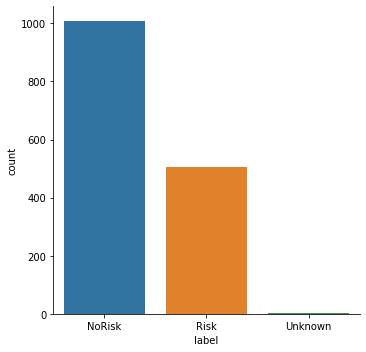

In [175]:
sns.catplot('label', data = df_copy5_1, kind='count' )
##unknown extra value is "unknown"

In [176]:
##find locations of "unknown"
unknown_label = []
n_l = df_copy5_1['label']        ##all  label values stored here
c = 0                            ##counter variable
for item in n_l:
    if item == "Unknown":        ##if any item in list is "Unknown" 
        unknown_label.append(c)  ##append location
    c = c + 1
unknown_label

[475, 523]

### Label fix up
With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case

In [177]:
df_copy5_1.loc[812,:]  ##original data

Random          0.756938
Id                190671
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  76
Contra                50
label                NaN
Name: 812, dtype: object

In [178]:
w = [[2,2,1,1,2,2,75,50]] ##variable to put array values
clf.predict(w) ##classifier predicted norisk
x = df_copy5_1.loc[812,:]
x[10]= "NoRisk"
df_copy5_1.loc[812,:] = x ##value changed to no risk and replaced

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [179]:
df_copy5_1.loc[974,:]

Random          0.923418
Id                165432
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  80
Contra                70
label                NaN
Name: 974, dtype: object

In [180]:
w = [[2,2,1,1,1,2,80,70]]
clf.predict(w) ##no risk
x = df_copy5_1.loc[974,:]
x[10]= "NoRisk"
df_copy5_1.loc[812,:] = x ##value changed to no risk and replaced

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [181]:
df_copy5_1.loc[1418,:]

Random          0.813102
Id                169726
Indication           TIA
Diabetes             yes
IHD                   no
Hypertension          no
Arrhythmia            no
History              yes
IPSI                  90
Contra                50
label                NaN
Name: 1418, dtype: object

In [182]:
w = [[4,1,2,2,2,1,95,50]] ##variable to put array values
print(clf.predict(w))     ##classifier predicted norisk
x = df_copy5_1.loc[1418,:]
x[10] = "NoRisk"
df_copy5_1.loc[1418,:] = x ##value is replaced


[1.]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [183]:
df_copy5_1.loc[475,:]

Random          0.298074
Id                173791
Indication           ASx
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                55
label            Unknown
Name: 475, dtype: object

In [184]:
w = [[3,2,1,1,2,2,70,55]] ##variable to put array values
print(clf.predict(w))     ##classifier predicted risk
x = df_copy5_1.loc[475,:]
x[10] = "Risk"
df_copy5_1.loc[475,:] = x ##value is replaced


[2.]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [185]:
df_copy5_1.loc[523,:]

Random          0.46017
Id               283846
Indication          CVA
Diabetes             no
IHD                  no
Hypertension        yes
Arrhythmia          yes
History              no
IPSI                 95
Contra              100
label           Unknown
Name: 523, dtype: object

In [186]:
w = [[2,2,2,1,1,2,95,100]] ##variable to put array values
print(clf.predict(w))     ##classifier predicted risk
x = df_copy5_1.loc[523,:]
x[10] = "Risk"
df_copy5_1.loc[523,:] = x ##value is replaced

[1.]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Second use case, filling up Hypertension values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [248]:
#df_copy5 = sklearn.utils.shuffle(df_copy5) # always shuffle your data to avoid any biases 
X = df_copy5.drop("Hypertension", axis=1).values ##features(tewaked for hypertension)
y = df_copy5["Hypertension"].values ##labels(teaked for hypertension)

##training
test_size = 100
X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
clf = neighbors.KNeighborsClassifier(n_neighbors=14)
clf.fit(X_train, y_train)
print(f"Model accuracy:  {(clf.score(X_test, y_test))*100}")

Model accuracy:  67.0


Hypertension error checking

In [188]:
df_copy5_1['Hypertension'].describe()
##2 values as per data description in 'unique'

count     1517
unique       2
top         no
freq       784
Name: Hypertension, dtype: object

In [189]:
null_label = []
n_l = df_copy5_1['Hypertension'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[201, 590, 983]

## Hypertension Fixup

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case

In [190]:
df_copy5_1.loc[201,:]

Random          0.38879
Id               240232
Indication          CVA
Diabetes            yes
IHD                  no
Hypertension        NaN
Arrhythmia          yes
History              no
IPSI                 95
Contra               90
label              Risk
Name: 201, dtype: object

In [191]:
w = [[2,1,2,1,2,95,90,1]] ##variable to put array values
print(clf.predict(w)) ##has no hypertension
x = df_copy5_1.loc[201,:]
x[5] = "no"
df_copy5_1.loc[201,:] = x

[2]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [192]:
df_copy5_1.loc[590,:]

Random          0.70795
Id               289096
Indication          A-F
Diabetes             no
IHD                  no
Hypertension        NaN
Arrhythmia           no
History              no
IPSI                 78
Contra               30
label            NoRisk
Name: 590, dtype: object

In [193]:
w = [[1,2,2,2,2,78,30,2]] ##variable to put array values
print(clf.predict(w)) ##has no hypertension
x = df_copy5_1.loc[590,:]
x[5] = "no"
df_copy5_1.loc[590,:] = x

[2]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [194]:
df_copy5_1.loc[983,:]

Random          0.319215
Id                158024
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         NaN
Arrhythmia            no
History               no
IPSI                  75
Contra                75
label             NoRisk
Name: 983, dtype: object

In [195]:
w = [[1,2,2,2,2,78,30,2]] ##variable to put array values
print(clf.predict(w)) ##has no hypertension
x = df_copy5_1.loc[983,:]
x[5] = "no"
df_copy5_1.loc[983,:] = x

[2]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Third use case, filling up Indication values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [251]:
#df_copy5 = sklearn.utils.shuffle(df_copy5) # always shuffle your data to avoid any biases 
X = df_copy5.drop("Indication", axis=1).values ##features(tewaked for Indication)
y = df_copy5["Indication"].values ##labels(teaked for Indication)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
clf = neighbors.KNeighborsClassifier(n_neighbors=14)
clf.fit(X_train, y_train)##hyperparametres. explain in doc
print(f"Model accuracy:  {(clf.score(X_test, y_test))*100}")

Model accuracy:  54.0


In [197]:
null_label = []
n_l = df_copy5_1['Indication'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[442, 822, 1007]

## Indication fixup

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" Indication during value input into array

In [198]:
df_copy5_1.loc[442,:]

Random          0.648122
Id                261060
Indication           NaN
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                40
label             NoRisk
Name: 442, dtype: object

In [199]:
w = [[2,1,1,2,2,70,40,2]]       ##variable to put array values
print(clf.predict(w))           ## A-F
x = df_copy5_1.loc[442,:]
x[2] = "A-F"
df_copy5_1.loc[442,:] = x       ##replace value

[1]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [200]:
df_copy5_1.loc[822,:]

Random          0.21176
Id               205845
Indication          NaN
Diabetes             no
IHD                 yes
Hypertension         no
Arrhythmia           no
History              no
IPSI                 80
Contra              100
label              Risk
Name: 822, dtype: object

In [201]:
w = [[2,1,2,2,2,80,100,1]]     ##variable to put array values
print(clf.predict(w))           ## A-F
x = df_copy5_1.loc[822,:]
x[2] = "A-F"  ##sometimes 4? 1
df_copy5_1.loc[822,:] = x       ##replace value

[1]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [202]:
df_copy5_1.loc[1007,:]

Random          0.761219
Id                256076
Indication           NaN
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia           yes
History              yes
IPSI                  99
Contra               100
label               Risk
Name: 1007, dtype: object

In [203]:
w = [[2,2,2,1,1,99,100,1]]      ##variable to put array values
print(clf.predict(w))           ## A-F
x = df_copy5_1.loc[1007,:]
x[2] = "A-F"
df_copy5_1.loc[1007,:] = x       ##replace value

[2]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Fourth use case, filling up IPSI values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 

In [265]:
#df_copy5 = sklearn.utils.shuffle(df_copy5) # always shuffle your data to avoid any biases 
X = df_copy5.drop("IPSI", axis=1).values ##features(tewaked for Indication)
y = df_copy5["IPSI"].values ##labels(teaked for Indication)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_test = X[-test_size:]
y_test = y[-test_size:]
clf = neighbors.KNeighborsClassifier(n_neighbors=14)
clf.fit(X_train, y_train)
print(f"Model accuracy:  {(clf.score(X_test, y_test))*100}")

Model accuracy:  37.0


In [205]:
null_label = []
n_l = df_copy5_1['IPSI'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[620, 752, 845, 916]

## IPSI fixup

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" IPSI during value input into array

In [206]:
df_copy5_1.loc[620,:]

Random          0.283872
Id                227779
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                 NaN
Contra               100
label               Risk
Name: 620, dtype: object

In [207]:
w = [[1,2,2,2,2,2,100,1]] ##variable to put array values
print(clf.predict(w))           ## A-F
x = df_copy5_1.loc[620,:]
x[8] = 75
df_copy5_1.loc[620,:] = x       ##replace value

[75.]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [208]:
df_copy5_1.loc[752,:]

Random          0.243518
Id                146415
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                 NaN
Contra               100
label               Risk
Name: 752, dtype: object

In [209]:
w = [[2,2,1,1,1,2,100,1]]       ##variable to put array values
print(clf.predict(w))           ## A-F
x = df_copy5_1.loc[752,:]
x[8] = 90
df_copy5_1.loc[752,:] = x       ##replace value

[90.]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [210]:
df_copy5_1.loc[845,:]

Random          0.920096
Id                104176
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                 NaN
Contra                20
label             NoRisk
Name: 845, dtype: object

In [211]:
w = [[2,2,2,2,2,2,20,2]]        ##variable to put array values
print(clf.predict(w))           ## A-F
x = df_copy5_1.loc[845,:]
x[8] = 60
df_copy5_1.loc[845,:] = x       ##replace value

[75.]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [212]:
df_copy5_1.loc[916,:]

Random          0.00450114
Id                  281679
Indication             A-F
Diabetes                no
IHD                     no
Hypertension            no
Arrhythmia              no
History                 no
IPSI                   NaN
Contra                  50
label               NoRisk
Name: 916, dtype: object

In [213]:
w = [[1,2,2,2,2,2,50,2]]        ##variable to put array values
print(clf.predict(w))           ## A-F
x = df_copy5_1.loc[916,:]
x[8] = 74
df_copy5_1.loc[916,:] = x       ##replace value

[70.]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Fifth use case, filling up Contra values

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 


In [266]:
#df_copy5 = sklearn.utils.shuffle(df_copy5) # always shuffle your data to avoid any biases 
X = df_copy5 .drop("Contra", axis=1).values ##features(tewaked for IPSI)
y = df_copy5 ["Contra"].values ##labels(teaked for IPSI)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_train=X_train.astype('int') ##makes sure values are transformed into int type
y_train = y_train.astype('int')##makes sure values are transformed into int type

X_test = X[-test_size:]
y_test = y[-test_size:]

X_test=X_test.astype('int')##makes sure values are transformed into int type
y_test = y_test.astype('int')##makes sure values are transformed into int type

clf = neighbors.KNeighborsClassifier(n_neighbors=14)
clf.fit(X_train, y_train)
print(f"Model accuracy:  {(clf.score(X_test, y_test))*100}")

Model accuracy:  44.0


ith respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" Contra during value input into array

In [215]:
Contra_column = df_copy5_1['Contra']
Contra_null_index_positions = []
c = 0
for item in Contra_column:
    if item == " ":
        Contra_null_index_positions.append(c)
    c = c + 1
    
Contra_null_index_positions

[453]

In [216]:
df_copy5_1.loc[453,:]

Random          0.518558
Id                254469
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra                  
label             NoRisk
Name: 453, dtype: object

In [267]:
w = [[3,2,2,1,2,2,70,2]] ##variable to put array values
print(clf.predict(w)) ## 60
x = df_copy5_1.loc[453,:]
x[9] = 60
df_copy5_1.loc[453,:]= x

[20]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


IndexError: index 9 is out of bounds for axis 0 with size 9

## Sixth use case, filling up Diabetes values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 


In [262]:
#df_copy5 = sklearn.utils.shuffle(df_copy5) # always shuffle your data to avoid any biases 
X = df_copy5 .drop("Diabetes", axis=1).values ##features(tewaked for diabetes)
y = df_copy5 ["Diabetes"].values ##labels(teaked for diabetes)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_train=X_train.astype('int') ##makes sure values are transformed into int type
y_train = y_train.astype('int')##makes sure values are transformed into int type

X_test = X[-test_size:]
y_test = y[-test_size:]

X_test=X_test.astype('int')##makes sure values are transformed into int type
y_test = y_test.astype('int')##makes sure values are transformed into int type

clf = neighbors.KNeighborsClassifier(n_neighbors=14)
clf.fit(X_train, y_train)
print(f"Model accuracy:  {(clf.score(X_test, y_test))*100}")


Model accuracy:  98.0


In [219]:
null_label = []
n_l = df_copy5_1['Diabetes'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label


[447, 514]

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" Diabetes during value input into array


In [220]:
df_copy5_1.loc[447,:]

Random          0.681744
Id                224257
Indication           CVA
Diabetes             NaN
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 447, dtype: object

In [221]:
w = [[2,1,1,1,2,90,100,1]] ##variable to put array values
print(clf.predict(w)) ## 60
x = df_copy5_1.loc[447,:]
x[3] = "no"
df_copy5_1.loc[447,:]= x

[2]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [222]:
df_copy5_1.loc[514,:]

Random          0.39213
Id               210861
Indication          A-F
Diabetes            NaN
IHD                  no
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 80
Contra               40
label            NoRisk
Name: 514, dtype: object

In [223]:
w = [[1,2,1,2,2,80,40,2]] ##variable to put array values
print(clf.predict(w)) ## 60
x = df_copy5_1.loc[514,:]
x[3] = "no"
df_copy5_1.loc[514,:]= x

[2]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Seventh use case, filling up History values 

Requires the same method as used in label however, all we need to change are the features. The mapping stays the same. 


In [263]:
#df_copy5 = sklearn.utils.shuffle(df_copy5) # always shuffle your data to avoid any biases 
X = df_copy5 .drop("History", axis=1).values ##features(tewaked for diabetes)
y = df_copy5 ["History"].values ##labels(teaked for diabetes)

##training
test_size = 100

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_train=X_train.astype('int') ##makes sure values are transformed into int type
y_train = y_train.astype('int')##makes sure values are transformed into int type

X_test = X[-test_size:]
y_test = y[-test_size:]

X_test=X_test.astype('int')##makes sure values are transformed into int type
y_test = y_test.astype('int')##makes sure values are transformed into int type

clf = neighbors.KNeighborsClassifier(n_neighbors=14)
clf.fit(X_train, y_train)
print(f"Model accuracy:  {(clf.score(X_test, y_test))*100}")


Model accuracy:  100.0


In [264]:
null_label = []
n_l = df_copy5_1['History'].isnull()
c = 0
for item in n_l:
    if item == True:
        null_label.append(c)
    c = c + 1
null_label

[]

With respect to mapping done previously, we simple create a 2d array which appropriately matches the same way we mapped data for the model and pass it over to our model to give a prediction as shown below(class dictionaries):

* Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3, "Asx": 3, "TIA": 4}
* Dual_class_dict = {"yes": 1, "no": 2}
* label_class_dict = {"Risk": 1, "NoRisk": 2}

Note, during data preparation,  Random and ID column were excluded therefore we will do the same in this case
Also, since we excluded Indication in our features, we "skip" History during value input into array

In [226]:
df_copy5_1.loc[337,:]

Random          0.617072
Id                260770
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History              NaN
IPSI                  85
Contra                50
label             NoRisk
Name: 337, dtype: object

In [227]:
w = [[2,2,1,2,2,85,50,2]] ##variable to put array values
print(clf.predict(w)) ## 60
x = df_copy5_1.loc[337,:]
x[7] = "no"
df_copy5_1.loc[337,:]= x

[2]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [228]:
df_copy5_1.loc[784,:]

Random          0.243645
Id                196483
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History              NaN
IPSI                  95
Contra               100
label               Risk
Name: 784, dtype: object

In [229]:
w = [[2,2,2,1,1,95,100,1]] ##variable to put array values
print(clf.predict(w)) ## 60
x = df_copy5_1.loc[784,:]
x[7] = "no"
df_copy5_1.loc[784,:]= x

[2]


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Modelling 3

## Data preparation

Data from the cleaned dataframe is transformed into values through mapping.


In [230]:
#class dictionaries
Indication_class_dict = {"A-F": 1, "CVA": 2, "ASx": 3,"Asx": 3, "TIA": 4}
Dual_class_dict = {"yes": 1, "no": 2}
label_class_dict = {"Risk": 1, "NoRisk": 2, "NaN": 3}

##mapping
df_copy5_1['Diabetes'] = df_copy5_1['Diabetes'].map(Dual_class_dict)
df_copy5_1['Hypertension'] = df_copy5_1['Hypertension'].map(Dual_class_dict)
df_copy5_1['History'] = df_copy5_1['History'].map(Dual_class_dict)
df_copy5_1['Indication'] = df_copy5_1['Indication'].map(Indication_class_dict)
df_copy5_1['Arrhythmia'] = df_copy5_1['Arrhythmia'].map(Dual_class_dict)
df_copy5_1['IHD'] = df_copy5_1['IHD'].map(Dual_class_dict)
df_copy5_1['label'] = df_copy5_1['label'].map(label_class_dict)


## Modelling 3

In [231]:
df_copy5_1= sklearn.utils.shuffle(df_copy5_1) #always shuffle your data to avoid any biases 
df_copy5_1.drop(df_copy5_1.columns[[0, 1]], axis = 1, inplace = True) 


C:\Users\scowt\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## test/train split phase

In [232]:
X = df_copy5_1.drop("label", axis=1).values
y = df_copy5_1["label"].values
##training
test_size = 50

X_train = X[:-test_size] ##upto the last 50
y_train = y[:-test_size] ##upto the last 50

X_train=X_train.astype('int')##makes sure values are transformed into int type
y_train = y_train.astype('int')##makes sure values are transformed into int type

X_test = X[-test_size:]
y_test = y[-test_size:]

X_test=X_test.astype('int')##makes sure values are transformed into int type
y_test = y_test.astype('int')##makes sure values are transformed into int type


X_test=X_test.astype('int')##makes sure values are transformed into int type
y_test = y_test.astype('int')##makes sure values are transformed into int type

## Modelling 3.0(SVM)

In [233]:
clf = svm.SVR()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
model_predictions  = []
actual_predictions = []
for X, y in zip(X_test, y_test):
    ##print(f"Model: {model.predict([X])[0]}, Actual: {y}")
    model_predictions.append(clf.predict([X])[0])
    actual_predictions.append(y)

C:\Users\scowt\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9270012933877947


## (Modelling 3.1)Logistic regression

In [234]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.94


C:\Users\scowt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\scowt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## (Modelling 3.2)MLP

In [235]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='sgd', max_iter=500000, hidden_layer_sizes=(10,20,30,35,45,30,40,50,20,10), random_state=42)
trained_model = model.fit(X_train,y_train)
print(trained_model.score(X_test, y_test))

0.76
